Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "NikitaSadikov"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [3]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = 1
    for k in range(D):
        g = (2 + k) / 2
        V = V * np.pi**0.5 * R * sp.gamma(g)/sp.gamma(g+1/2)
    return V

In [4]:
getSphereVolumeExact(2) #Для окружности

3.1415926535897927

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

Text(0, 0.5, 'Объем')

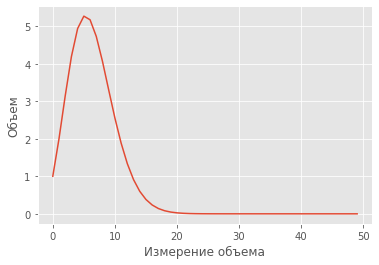

In [5]:
x = 50
y = [getSphereVolumeExact(d) for d in range(x)]
plt.figure()
plt.plot(np.arange(x), y)
plt.xlabel("Измерение объема")
plt.ylabel("Объем")


### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [37]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """

    p = np.random.uniform(low = -R, high = R, size = (N, D))
    k = np.count_nonzero([np.linalg.norm(p[i]) < R for i in range(N)])
    V= (2 * R) ** D
    V = k / N * V

    return V

In [38]:
getSphereVolumePseudorandom(10000, 2, R = 1)

3.1608

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

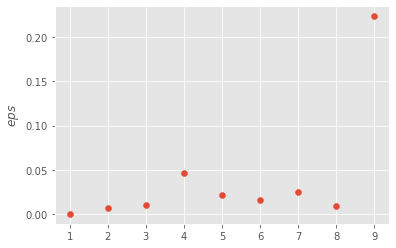

In [46]:
e = []
dk = np.arange(1, 10)
N = 1000
for d in dk:
    eps = abs(getSphereVolumePseudorandom(N, d) / getSphereVolumeExact(d) - 1 )
    e.append(eps)
plt.ylabel('$eps$')
plt.scatter(dk, e, label='eps$')
plt.show()


### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [9]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq
# YOUR CODE HERE
raise NotImplementedError()

ModuleNotFoundError: No module named 'sobol_seq'

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [10]:
sobol_seq.i4_sobol_generate?

Object `sobol_seq.i4_sobol_generate` not found.


In [ ]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

YOUR ANSWER HERE

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [53]:
from scipy import integrate

d1 = lambda x: np.e**(-x**2) / (1 + x**2)
d2 = lambda x, y: np.e ** (-x**2-y**2)/(1+x**2+y**2)
p=0
N = 60000
k = 0 
for d in [1, 2,3,4,5]:
    z = np.random.normal(k, 1 / np.sqrt(2), size=(d, N))
    for i in range(d):
        p += z[i]**2
    I = (np.sqrt(np.pi) ** d / (1 + p)).sum() / 60000
    p = 0
    print(d, I)



1 1.345322363723458
2 1.8754505364813927
3 2.703133016984041
4 3.980579866743196
5 6.030850939440626


In [50]:
print(f' I = {integrate.quad(d1, -np.inf, np.inf)[0]}')
print(f' I = {integrate.dblquad(d2, -np.inf, np.inf, -np.inf, np.inf)[0]}')

 I = 1.3432934216467354
 I = 1.873480492462358


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [47]:
def getSample(N):
    s = []
    c = 0
    w = lambda x: np.sqrt(1 - x ** 2)
    while c < N:
        y = np.random.uniform(0,1)
        x = np.random.uniform(-1,1)
        if y < w(x):
            s.append(x)
            c += 1
    return s

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

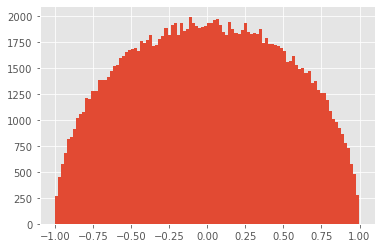

In [48]:
plt.hist(getSample(150000), 100)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [15]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = -2 * np.random.randint(2, size=(N,N)) + 1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [16]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = len(state)
    dE = float(2 *state[i][j]*(state[(i - 1) % N][j] + state[(i + 1) % N][j] + state[i][(j - 1) % N] + state[i][(j + 1) % N]))
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [17]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    n = state.shape[0]
    for c in range(N * N):
        i = np.random.randint(0, high=n)
        j = np.random.randint(0, high=n)
        d = getDeltaE(i, j, state)
        if d < 0:
            state[i,j] *= -1
        else:
            if np.random.sample() < np.exp(-d / T):
                state[i,j] *= -1
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [18]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = len(state)
    E = 0
    for i in range(N):
        for j in range(N):
            E += state[i][j] * (state[(i - 1) % N][j] + state[(i + 1) % N][j] + state[i][(j - 1) % N] + state[i][(j + 1) % N])
    E = float(E)
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [19]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    N = len(state)
    M = 0
    for i in range(N):
        for j in range(N):
            M += state[i][j]
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [20]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

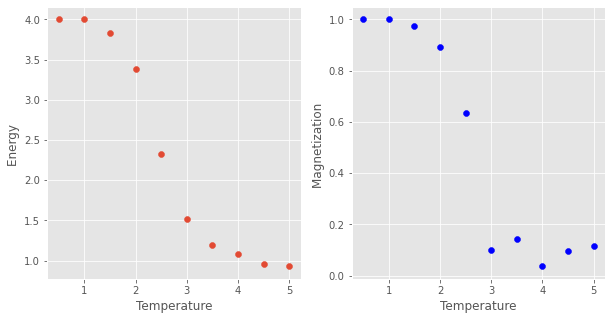

In [21]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Насколько я помню, при повышении температуры, намагниченность уменьшается и энергия тоже. При высоких температурах должно быть поведение как у парамагнетика. Фазовый переход наступает в точке Кюри, где намагниченность пропадает.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

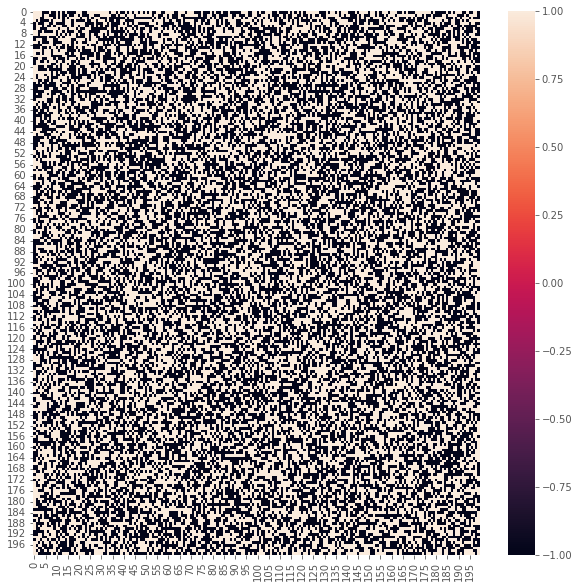

In [22]:
import seaborn as sns
N = 200
state = getInitialState(N)

plt.figure(figsize=(10, 10))
sns.heatmap(state)
plt.show()

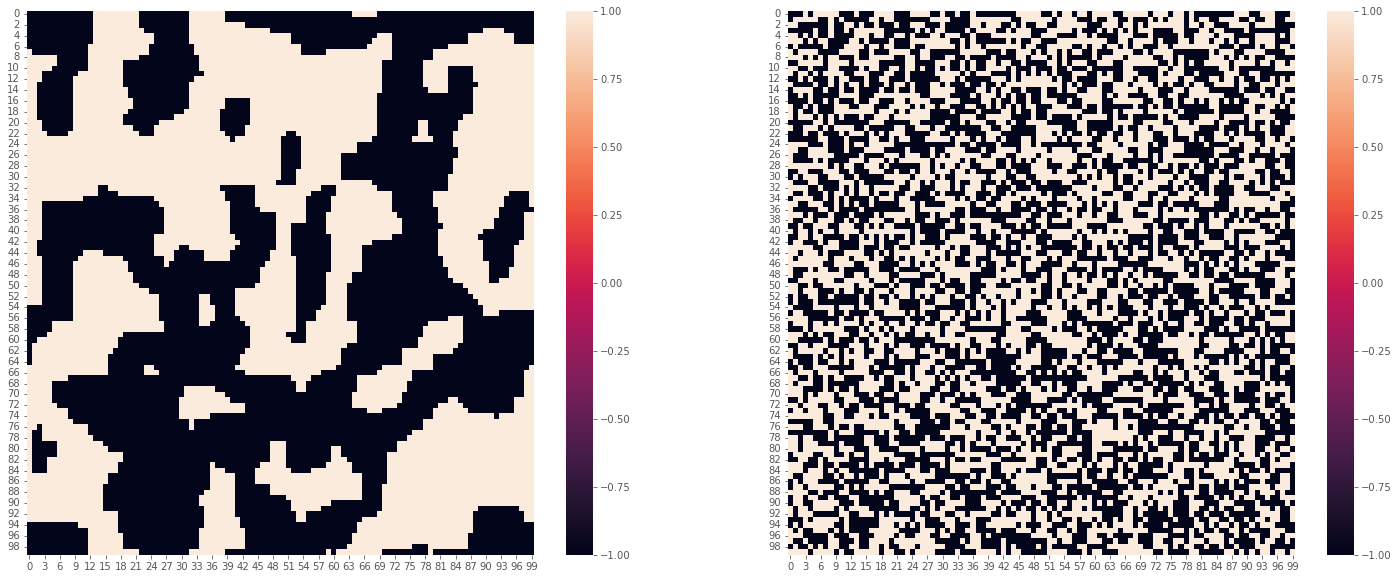

In [23]:
N = 100
s1 = getInitialState(N)
s2 = getInitialState(N)
fig, ax =plt.subplots(1, 2, figsize=(25, 10))
for _ in range(15):
    s1 = makeFlip(0.05, s1)
for _ in range(30):
    s2 = makeFlip(15, s2)
sns.heatmap(s1, ax=ax[0])
sns.heatmap(s2, ax=ax[1])



plt.show()

При небольшых температурах спины направлены в одну сторону (крупные кластеры одного цвета). При больших температурах наблюдаем беспорядок.